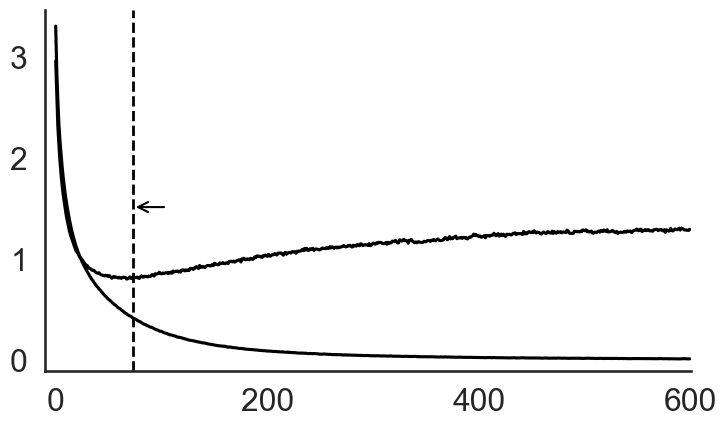

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set font size here
FONT_SIZE = 18

# Load Excel file
file_path = "/Users/ebrahimfeghhi/Documents/neurips_2025/local_results/train_val_gru_long_epoch.xlsx"
df = pd.read_excel(file_path)

# Melt the DataFrame for seaborn
df_long = df.reset_index().melt(id_vars="index", value_vars=["train_loss", "val_loss"],
                                var_name="Phase", value_name="Loss")
df_long.rename(columns={"index": "Epoch"}, inplace=True)
df_long["Phase"] = df_long["Phase"].map({"train_loss": "Train", "val_loss": "Val"})

# Set font sizes
sns.set_context("talk", font_scale=FONT_SIZE / 13)  # 'talk' base scale is ~13 pt
sns.set_style("white")
plt.rcParams.update({'font.size': FONT_SIZE})

# Custom colors
palette = {"Train": "black", "Val": "black"}

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_long, x="Epoch", y="Loss", hue="Phase", palette=palette)
sns.despine()

# Axis limits
plt.xlim(left=-10, right=600)
plt.ylim(bottom=-0.1)
plt.xticks(ticks=[0, 200, 400, 600])
plt.yticks(ticks=[0, 1, 2, 3])

# Early stopping line
plt.axvline(x=73, color='black', linestyle='--', linewidth=2)
plt.annotate("",
             xy=(73, df_long["Loss"].min() + 1.5),
             xytext=(105, df_long["Loss"].min() + 1.5),
             arrowprops=dict(arrowstyle="->", color="black"),
             fontsize=FONT_SIZE, va="center")

plt.legend().set_visible(False)

# Save and show
plt.title("")
plt.tight_layout()
plt.xlabel("")
plt.ylabel("")
plt.savefig("gru_long_epoch_val_train_loss.pdf", format="pdf", bbox_inches="tight", transparent=True)
plt.show()


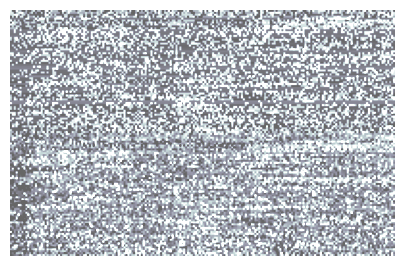

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

data = np.load('data/figure1_neural_data.npy')

plt.figure(figsize=(5, 3))
plt.imshow(data[:128, 0:200], clim=[-1, 1], alpha=0.6, cmap='bone')
#plt.xlabel("Time (s)", fontsize=20, labelpad=-10)
#plt.ylabel("Features", fontsize=20)
#plt.tick_params(axis='x', length=0)
#plt.xticks([0, 200], [0, 1])
plt.yticks([])
plt.xticks([])

# Transparent rectangle
#rect = patches.Rectangle((50, -5), 100, 128,
#                         facecolor='blue', edgecolor='none', linewidth=2, clip_on=False, alpha=0.2)
#plt.gca().add_patch(rect)

# Transparent rectangle
#rect = patches.Rectangle((65, 0), 100, 128,
#                         facecolor='red', edgecolor='none', linewidth=2, clip_on=False, alpha=0.2)
#plt.gca().add_patch(rect)



# Adjust y-limits to show full rectangle
#plt.ylim(0, 135)

# Despine all axes
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.savefig("input_neural_data.pdf", format="pdf", bbox_inches="tight", pad_inches=0)

plt.tight_layout()
plt.show()






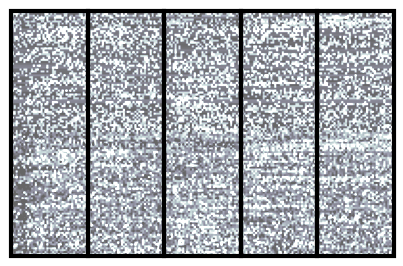

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

data = np.load('data/figure1_neural_data.npy')

plt.figure(figsize=(5, 3))
plt.imshow(data[:128, 0:200], clim=[-1, 1], alpha=0.6, cmap='bone')
plt.yticks([])
plt.xticks([])

# Add 5 black rectangles, each covering 1/5th of the x-axis
num_rects = 5
total_width = 200
rect_width = total_width // num_rects

for i in range(num_rects):
    x = i * rect_width
    rect = patches.Rectangle(
        (x, 0), rect_width, 128,  # (x, y), width, height
        facecolor='none', edgecolor='black', linewidth=3, clip_on=False
    )
    plt.gca().add_patch(rect)

# Despine all axes
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig("input_neural_data_patched.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()


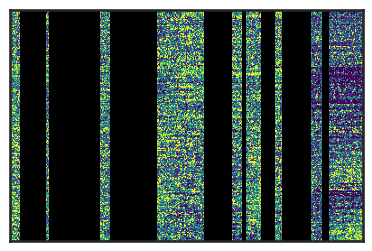

In [122]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# Set seed for reproducibility
random.seed(42)

data = np.load('data/figure1_neural_data.npy')

data_plot = data[:, 200:]

# Randomly select 20 integers from 0 to 391 (inclusive)
start_idxs = random.sample(range(392-30), 20)

# Randomly select 20 integers from 0 to 29 (inclusive)
mask_length = random.sample(range(30), 20)

for s, m in zip(start_idxs, mask_length):
    
    data_plot[:, s:s+m] = np.nan
    
cmap = plt.cm.viridis.copy()
cmap.set_bad(color='black')
    
plt.figure(figsize=(5, 3))
plt.imshow(data_plot, clim=[-1, 1], alpha=1.0, cmap=cmap)
plt.xlabel("")
plt.ylabel("")
plt.tick_params(axis='x', length=0)
plt.xticks([0, 350], [0, 7])
plt.xticks([])

plt.yticks([])

    
plt.savefig("masked_data.pdf", format="pdf", bbox_inches="tight", pad_inches=0)

plt.show()


<AxesSubplot:xlabel='index', ylabel='Loss'>

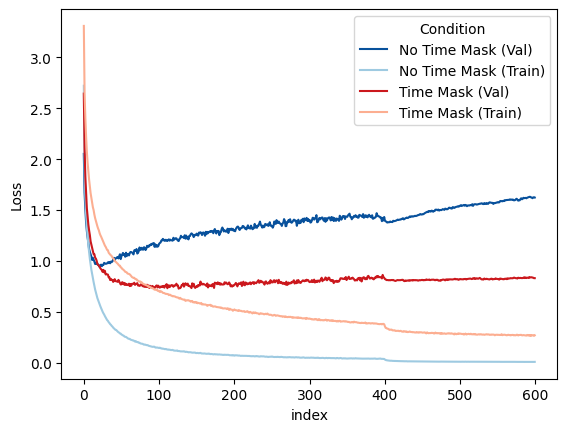

<AxesSubplot:>

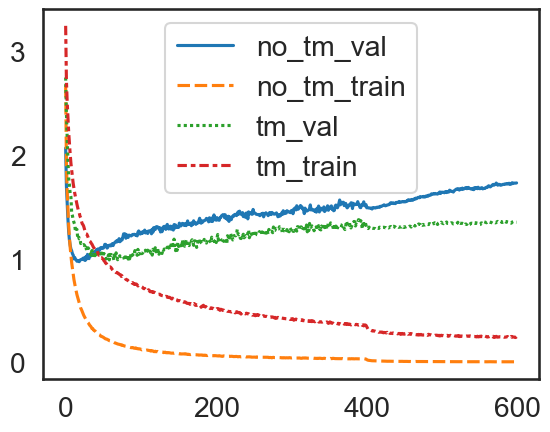

In [15]:
# Create random values for the other 4 bars
probs = [0.1, 0.1, 0.65, 0.05, 0.05]
green_index = 2
# Define colors: green for selected index, red for others
colors = ['red'] * 5
colors[green_index] = 'green'

# Plot and save the bar plot
fig, ax = plt.subplots(figsize=(2, 2), dpi=300)
ax.bar(np.arange(5), probs, color=colors, alpha=0.6)
ax.set_ylim(0, 0.6)
ax.axis('off')
plt.tight_layout()
plt.savefig("bar_distribution_highest_green_4.pdf", bbox_inches='tight')
plt.close()